In [1]:
#import numpy as np
import pandas as pd
import osmnx as ox
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from shapely.geometry import box
#from geopy.distance import geodesic
#from scipy.spatial import cKDTree
import contextily as ctx

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Extract the file containing  data
import shapely.wkt
import re
import json
from shapely.geometry import Polygon, MultiPolygon

file_path = 'data_CSV/019HexaSmal-full.csv'
df = pd.read_csv(file_path, sep=',')

file_path = 'raw_data1.csv'

df_paris = pd.read_csv(file_path)
df_paris = df_paris[df_paris['departure'] == 'Paris']

def geojson_to_polygon(geojson_str):
    # Parse the GeoJSON string into a dictionary
    if pd.isna(geojson_str):
        return None  # or return an appropriate placeholder (e.g., an empty Polygon)
    
    geojson = json.loads(geojson_str)

    # Check the type of geometry
    geom_type = geojson.get("type")

    if geom_type == "Polygon":
        # Extract coordinates for a single Polygon
        coordinates = geojson["coordinates"][0]
        # Create a Shapely Polygon
        return Polygon([(lon, lat) for lon, lat in coordinates])
    
    elif geom_type == "MultiPolygon":
        # Extract coordinates for MultiPolygon
        polygons = []
        for coords in geojson["coordinates"]:
            polygons.append(Polygon([(lon, lat) for lon, lat in coords[0]]))
        # Create a MultiPolygon object
        return MultiPolygon(polygons)
    
    else:
        raise ValueError(f"Unsupported geometry type: {geom_type}")


df['polygon'] = df['_contours_commune.geometry'].apply(geojson_to_polygon)

print(df['polygon'])


/var/folders/ym/s4xnst_s0y769j7rl84pgpww0000gn/T/ipykernel_8590/1256301097.py:12: DtypeWarning: Columns (8,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_paris = pd.read_csv(file_path)


0        POLYGON ((4.9584116 46.1532733, 4.9555914 46.1...
1        POLYGON ((5.4302024 45.9827747, 5.434411 45.98...
2        POLYGON ((5.4088198 45.9420608, 5.4094236 45.9...
3        POLYGON ((4.9429765 45.9796173, 4.9426022 45.9...
4        POLYGON ((5.5708254 45.7533844, 5.5708767 45.7...
                               ...                        
39187    MULTIPOLYGON (((164.71385201689043 -21.0540754...
39188    MULTIPOLYGON (((166.55107020459138 -21.8467194...
39189    MULTIPOLYGON (((165.7892896503955 -21.34131957...
39190                                                 None
39191                                                 None
Name: polygon, Length: 39192, dtype: object


In [3]:
# Load your dataframes with a specified encoding
file_path = 'data_CSV/insee_rp_hist_1968(1).csv'
df_pop = pd.read_csv(file_path, sep=',', encoding='latin1') 

file_path = 'data_CSV/population_arrondissement_paris.csv'
df_arrondissement = pd.read_csv(file_path, sep=';', encoding='latin1') 

df_pop_2021 = df_pop[df_pop['an']== float(2021)]

# Select the postal code and density columns
new_rows = df_arrondissement[['code_postal', 'densitÃ©_pop']].copy()

# Rename columns to match `df_pop`
new_rows.rename(columns={'code_postal': 'codgeo', 'densitÃ©_pop': 'dens_pop'}, inplace=True)

# Add empty columns for the rest of `df_pop`'s structure
for col in df_pop_2021.columns:
    if col not in new_rows.columns:
        new_rows[col] = pd.NA

# Reorder columns to match `df_pop`
new_rows = new_rows[df_pop.columns]

# Step 3: Append the new rows to `df_pop`
df_pop_2021 = pd.concat([df_pop_2021, new_rows], ignore_index=True)

# Step 4: Save or inspect the updated DataFrame
print(df_pop_2021['codgeo'])

filtered_df = df_pop_2021[df_pop_2021['codgeo'] == float(91201)]

# Print all the information for the filtered rows
print(filtered_df,'je teste un truc')

0          01001
1          01002
2          01004
3          01005
4          01006
          ...   
34951    75117.0
34952    75118.0
34953    75119.0
34954    75120.0
34955        NaN
Name: codgeo, Length: 34956, dtype: object
        codgeo   libgeo      an  dens_pop
34366  91201.0  Draveil  2021.0   1846.39 je teste un truc


/var/folders/ym/s4xnst_s0y769j7rl84pgpww0000gn/T/ipykernel_8590/4240752752.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pop = pd.read_csv(file_path, sep=',', encoding='latin1')
/var/folders/ym/s4xnst_s0y769j7rl84pgpww0000gn/T/ipykernel_8590/4240752752.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pop_2021 = pd.concat([df_pop_2021, new_rows], ignore_index=True)


In [4]:
print(type(df_pop_2021['codgeo'].iloc[10384]))
print(str(df_pop_2021['codgeo'].iloc[10535])[1])
print(str(df_pop_2021['codgeo'].iloc[10535])[1]=='A')
print(str(df_pop_2021['codgeo'].iloc[10534])[1])
print(str(df_pop_2021['codgeo'].iloc[10534])[1]=='A')
print(str(df_pop_2021['codgeo'].iloc[10894])[1])
print(str(df_pop_2021['codgeo'].iloc[10894])[1]=='B')
print(str(df_pop_2021['codgeo'].iloc[10895])[1])
print(str(df_pop_2021['codgeo'].iloc[10895])[1]=='B')

print(df_pop_2021['codgeo'].shape)
print(df['#Code_commune_INSEE'].shape)
print(str(df['#Code_commune_INSEE'].iloc[11841])[1]=='A')
print(str(df['#Code_commune_INSEE'].iloc[11841])[1])
print(str(df['#Code_commune_INSEE'].iloc[11842])[1]=='A')
print(str(df['#Code_commune_INSEE'].iloc[11842])[1])
print(str(df['#Code_commune_INSEE'].iloc[12260])[1]=='B')
print(str(df['#Code_commune_INSEE'].iloc[12260])[1])
print(str(df['#Code_commune_INSEE'].iloc[12261])[1]=='B')
print(str(df['#Code_commune_INSEE'].iloc[12261])[1])

<class 'str'>
A
True
9
False
B
True
0
False
(34956,)
(39192,)
False
9
True
A
True
B
False
0


In [5]:
# Supprimer les espaces en début/fin de chaîne de caractères (utile si type est string)
df_pop_2021['codgeo'] = df_pop_2021['codgeo'].astype(str)
df['#Code_commune_INSEE'] = df['#Code_commune_INSEE'].astype(str)
df['#Code_commune_INSEE'] = df['#Code_commune_INSEE'].str.strip()
df_pop_2021['codgeo'] = df_pop_2021['codgeo'].str.strip() 

# Supprimer les lignes entre 100 et 200 (inclus)
df_pop_2021 = df_pop_2021.drop(df_pop_2021.index[10535:10895])
df_pop_2021['codgeo'] = df_pop_2021['codgeo'].astype(float)

#df_pop_2021['codgeo'] = df_pop_2021['codgeo'].astype(float)
df = df.drop(df.index[11842:12261])
df['#Code_commune_INSEE'] = df['#Code_commune_INSEE'].astype(float)
df = df.drop_duplicates(subset=['#Code_commune_INSEE'], keep='first')


filtered_df = df[df['#Code_commune_INSEE'] == float(91201)]

filtered_df = df_pop_2021[df_pop_2021['codgeo'] == float(91201)]

dftest = df_pop_2021[['codgeo', 'dens_pop']]
filtered_df = dftest[dftest['codgeo'] == float(91201)]
print(filtered_df,'je teste un truc')

print(df['#Code_commune_INSEE'].isna().sum())  # Nombre de NaN dans la colonne
print(df_pop_2021['codgeo'].isna().sum())    

# Merge the two dataframes on the specified columns
merged_df = pd.merge(df, df_pop_2021[['codgeo', 'dens_pop']], 
                     left_on='#Code_commune_INSEE', right_on='codgeo', 
                     how='left')

# If you want to keep the 'dens_pop' column in df
df['dens_pop'] = merged_df['dens_pop']

filtered_df = merged_df[merged_df['#Code_commune_INSEE'] == float(91201)]
print(filtered_df,'je teste un truc')
filtered_df = merged_df[merged_df['#Code_commune_INSEE'] == float(75115)]
print(filtered_df,'je teste un truc')



        codgeo  dens_pop
34366  91201.0   1846.39 je teste un truc
0
1
       #Code_commune_INSEE Nom_de_la_commune  Code_postal  \
34048              91201.0           DRAVEIL        91210   

      Libellé_d_acheminement Ligne_5  \
34048                DRAVEIL     NaN   

                              _contours_commune.geometry  \
34048  {"type":"Polygon","coordinates":[[[2.3899297,4...   

                                                 polygon   codgeo  dens_pop  
34048  POLYGON ((2.3899297 48.6918751, 2.3874077 48.6...  91201.0   1846.39   je teste un truc
       #Code_commune_INSEE Nom_de_la_commune  Code_postal  \
28921              75115.0          PARIS 15        75015   

      Libellé_d_acheminement Ligne_5  \
28921                  PARIS     NaN   

                              _contours_commune.geometry  \
28921  {"type":"Polygon","coordinates":[[[2.2894077,4...   

                                                 polygon   codgeo  dens_pop  
28921  POLYGON ((2.2894077 4

/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


       #Code_commune_INSEE Nom_de_la_commune  Code_postal  \
34048              91201.0           DRAVEIL        91210   

      Libellé_d_acheminement Ligne_5  \
34048                DRAVEIL     NaN   

                              _contours_commune.geometry  \
34048  {"type":"Polygon","coordinates":[[[2.3899297,4...   

                                                 polygon   codgeo  dens_pop  
34048  POLYGON ((2.3899297 48.6918751, 2.3874077 48.6...  91201.0   1846.39   je teste un truc


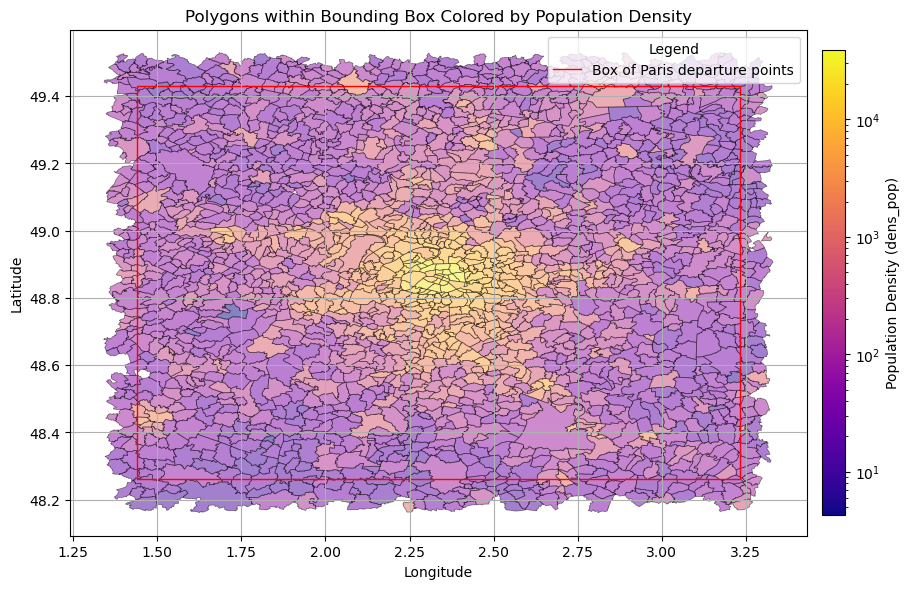

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry='polygon')

# Remove any rows where geometry is None
gdf = gdf[gdf['polygon'].notnull()]

# Define the latitude and longitude boundaries from the paris_df DataFrame
min_lat = df_paris['departure_latitude'].min()
max_lat = df_paris['departure_latitude'].max()
min_lon = df_paris['departure_longitude'].min()
max_lon = df_paris['departure_longitude'].max()

#min_lat = 48.7
#max_lat = 49
#min_lon = 2.1
#max_lon = 2.6

# Create the bounding box
bbox = box(min_lon - 0.1, min_lat - 0.1, max_lon + 0.1, max_lat + 0.1)
bbox1 = box(min_lon, min_lat, max_lon, max_lat)

# Filter the GeoDataFrame to keep only polygons within the bounding box
limited_gdf = gdf[gdf.geometry.within(bbox)]


# Ensure 'dens_pop' is present and convert NaN to 0 or a small number if needed for coloring
limited_gdf['dens_pop'] = limited_gdf['dens_pop'].fillna(0)  # Replace NaN with 0 or any small value


filtered_df = merged_df[merged_df['#Code_commune_INSEE'] == 91201]

# Print all the information for the filtered rows
print(filtered_df,'je teste un truc')
# Normalize population density (log scale for better contrast)
norm = LogNorm(limited_gdf['dens_pop'].min() + 1, limited_gdf['dens_pop'].max())
colors = plt.cm.plasma(norm(limited_gdf['dens_pop']))  # Use 'plasma' for better contrast

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygons with the corresponding colors
limited_gdf.plot(ax=ax, color=colors, alpha=0.5, edgecolor='black', linewidth=0.5)

# Plot the new bounding box (without margin) in red
gpd.GeoSeries(bbox1).plot(ax=ax, color='none', edgecolor='red', linewidth=1)

# Annotate with Code_commune_INSEE
# for x, y, label in zip(limited_gdf.geometry.centroid.x, limited_gdf.geometry.centroid.y, limited_gdf['#Code_commune_INSEE']):
    # ax.text(x, y, label, fontsize=4, ha='center', color='black')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array(limited_gdf['dens_pop'])  # 🔥 Utiliser les vraies données pour un rendu fidèle
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Population Density (dens_pop)')

# Créer un élément personnalisé pour la légende avec une ligne fine
bbox_line = Line2D([0], [0], color='red', linewidth=1, label='Box of Paris departure points')

# Ajouter la légende
ax.legend(handles=[bbox_line], title='Legend')

plt.title('Polygons within Bounding Box Colored by Population Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


In [7]:
print(limited_gdf['dens_pop'].max(),limited_gdf['dens_pop'].min())

38851.0 3.28


In [8]:
file_path_5 = 'data_CSV/donnee-data.gouv-2023-geographie2024-produit-le2024-07-05.csv'
df_5 = pd.read_csv(file_path_5, sep=';')

unique_classes = df_5['classe'].unique()
unique_years = df_5['annee'].unique()

print(unique_classes)
print(unique_years)

df_5['CODGEO_2024'] = pd.to_numeric(df_5['CODGEO_2024'], errors='coerce').astype('Int64')

# Assigning ratios
ratios = {
    'Vols violents sans arme': 1,
    'Vols avec armes': 1,
    'Violences sexuelles': 1
}

# Default ratio for other classes
default_ratio = 1

# Add a 'ratio' column based on the 'classe' column
df_5['ratio'] = df_5['classe'].map(ratios).fillna(default_ratio)

# Calculate weighted count based on 'faits' and ratio
df_5['weighted_count'] = df_5['faits'] * df_5['ratio']

# Sum the weighted counts for each CODGEO_2024
resultat = df_5.groupby('CODGEO_2024')['weighted_count'].sum().reset_index(name='weighted_sum')
resultat['norm_weighted_sum'] = resultat['weighted_sum'] / resultat['weighted_sum'].max()

# Displaying results
print(resultat.shape)
print(resultat['CODGEO_2024'].max(), resultat['CODGEO_2024'].min())
print(resultat)


/var/folders/ym/s4xnst_s0y769j7rl84pgpww0000gn/T/ipykernel_8590/12031593.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_5 = pd.read_csv(file_path_5, sep=';')


['Coups et blessures volontaires'
 'Coups et blessures volontaires intrafamiliaux'
 'Autres coups et blessures volontaires' 'Violences sexuelles'
 'Vols avec armes' 'Vols violents sans arme'
 'Vols sans violence contre des personnes' 'Cambriolages de logement'
 'Vols de véhicules' 'Vols dans les véhicules'
 "Vols d'accessoires sur véhicules"
 'Destructions et dégradations volontaires' 'Trafic de stupéfiants'
 'Usage de stupéfiants']
[16 17 18 19 20 21 22]
(34620, 3)
97617 1001
       CODGEO_2024  weighted_sum  norm_weighted_sum
0             1001           0.0           0.000000
1             1002           0.0           0.000000
2             1004        4791.0           0.003194
3             1005          98.0           0.000065
4             1006           0.0           0.000000
...            ...           ...                ...
34615        97613         806.0           0.000537
34616        97614        1387.0           0.000925
34617        97615        2995.0           0.00199

In [9]:
# Ensure the columns are properly named and have compatible types for merging
merged_df['#Code_commune_INSEE'] = pd.to_numeric(merged_df['#Code_commune_INSEE'], errors='coerce').astype('Int64')

# Merge the two DataFrames on the corresponding columns
merged_df = merged_df.merge(resultat[['CODGEO_2024', 'norm_weighted_sum']], 
                            left_on='#Code_commune_INSEE', 
                            right_on='CODGEO_2024', 
                            how='left')

# Merge the two DataFrames on the corresponding columns
merged_df = merged_df.merge(resultat[['CODGEO_2024', 'weighted_sum']], 
                            left_on='#Code_commune_INSEE', 
                            right_on='CODGEO_2024', 
                            how='left')


# Replace NaN in 'norm_weighted_sum' with 0 if needed (optional)
merged_df['norm_weighted_sum'] = merged_df['norm_weighted_sum'].fillna(0)
# Replace NaN in 'norm_weighted_sum' with 0 if needed (optional)
merged_df['weighted_sum'] = merged_df['weighted_sum'].fillna(0)

# Display the updated merged_df to verify
print(merged_df)


       #Code_commune_INSEE        Nom_de_la_commune  Code_postal  \
0                     1001  L ABERGEMENT CLEMENCIAT         1400   
1                     1002    L ABERGEMENT DE VAREY         1640   
2                     1004        AMBERIEU EN BUGEY         1500   
3                     1005      AMBERIEUX EN DOMBES         1330   
4                     1006                  AMBLEON         1300   
...                    ...                      ...          ...   
34702                98831                      VOH        98833   
34703                98832                     YATE        98834   
34704                98833                  KOUAOUA        98818   
34705                98901        ILE DE CLIPPERTON        98799   
34706                99138                   MONACO        98000   

        Libellé_d_acheminement Ligne_5  \
0      L ABERGEMENT CLEMENCIAT     NaN   
1        L ABERGEMENT DE VAREY     NaN   
2            AMBERIEU EN BUGEY     NaN   
3          AMBE

In [10]:
import openpyxl

# Charger le fichier Excel
file_path_xlsx = "data_CSV/info-complements-data.gouv-2023-geographie2024-produit-le2024-07-05.xlsx"

try:
    # Charger le fichier Excel avec openpyxl en mode lecture seule
    workbook = openpyxl.load_workbook(file_path_xlsx, read_only=True)

    # Liste des feuilles dans le fichier
    sheet_names = workbook.sheetnames
    print(f"Feuilles disponibles : {sheet_names}")

    # Sélectionner la feuille par son nom
    sheet_name = "zonages supracommunaux"  # Remplacez par le nom exact de la feuille
    if sheet_name in sheet_names:
        # Charger la feuille en DataFrame avec pandas
        df_zonages = pd.read_excel(file_path_xlsx, sheet_name=sheet_name, engine='openpyxl')
        
    else:
        print(f"La feuille '{sheet_name}' n'existe pas dans le fichier.")

except Exception as e:
    print(f"Erreur : {e}")


# Liste des catégories de densité
categories_densite = [
    "Grands centres urbains",
    "Centres urbains intermédiaires",
    "Petites villes",
    "Ceintures urbaines",
    "Bourgs ruraux",
    "Rural à habitat dispersé",
    "Rural à habitat très dispersé"
]

# Liste des catégories de densité
categories_statut_comm = [
    "Hors unité urbaine",
    "Banlieue",
    "Centre",
    "Isolées"
]

# Création des colonnes binaires (0/1) pour chaque catégorie
for cat in categories_densite:
    df_zonages[cat] = (df_zonages["Typo.degré.densité"] == cat).astype(int)

for cat in categories_statut_comm:
    df_zonages[cat] = (df_zonages["STATUT_COM_UU"] == cat).astype(int)

# Sélectionner uniquement les colonnes utiles pour la jointure
df_zonages = df_zonages[["CODGEO"] + categories_densite + categories_statut_comm]

# Filtrer et supprimer les lignes où "CODGEO" commence par "2A" ou "2B"
df_zonages = df_zonages[~df_zonages["CODGEO"].str.startswith(('2A', '2B'))]

# Assurer que merged_df et df_zonages ont le même type pour la colonne de jointure
df_zonages["CODGEO"] = df_zonages["CODGEO"].astype(int)
merged_df["#Code_commune_INSEE"] = merged_df["#Code_commune_INSEE"].astype(int)
#print(type(df_zonages["CODGEO"].iloc[4]))


# Jointure sur le code commune avec suffixes pour éviter les conflits
merged_df = merged_df.merge(df_zonages, left_on="#Code_commune_INSEE", right_on="CODGEO", how="left")


# Supprimer la colonne CODGEO qui est en double
merged_df.drop(columns=["CODGEO"], inplace=True)

#for cat in categories_densite:
  #  merged_df[cat] = merged_df[cat].astype(int)


# Filtrer merged_df où "#Code_commune_INSEE" est égal à 75008
#filtered_df = merged_df[merged_df["#Code_commune_INSEE"] == 76056]

# Affichage des lignes correspondantes
print(merged_df)

Feuilles disponibles : ['zonages supracommunaux', 'libelles supracommunaux', 'codes-libelles']
       #Code_commune_INSEE        Nom_de_la_commune  Code_postal  \
0                     1001  L ABERGEMENT CLEMENCIAT         1400   
1                     1002    L ABERGEMENT DE VAREY         1640   
2                     1004        AMBERIEU EN BUGEY         1500   
3                     1005      AMBERIEUX EN DOMBES         1330   
4                     1006                  AMBLEON         1300   
...                    ...                      ...          ...   
34702                98831                      VOH        98833   
34703                98832                     YATE        98834   
34704                98833                  KOUAOUA        98818   
34705                98901        ILE DE CLIPPERTON        98799   
34706                99138                   MONACO        98000   

        Libellé_d_acheminement Ligne_5  \
0      L ABERGEMENT CLEMENCIAT     NaN   
1   

In [ ]:
# 1️⃣ Convertir merged_df en GeoDataFrame si ce n'est pas déjà fait
merged_df = gpd.GeoDataFrame(merged_df, geometry='polygon')

# 2️⃣ Calculer la population (densité * surface du polygone)
merged_df['population'] = merged_df['dens_pop'] * merged_df.geometry.area  
merged_df['area']=merged_df.geometry.area 


# 3️⃣ Correction du calcul de 'safety' (évite la division par 0)
merged_df['safety'] = merged_df['weighted_sum'] / (merged_df['population']*100)
nan_count = merged_df['safety'].isna().sum()
print(len(merged_df['safety']))
print(f"Nombre de NaN dans la colonne 'safety' avant remplacement : {nan_count}")

merged_df['safety'] = merged_df['safety'].fillna(0)  # Remplace les NaN par 0
# print(merged_df['area'])

merged_df['safety1'] = merged_df['weighted_sum'] / (merged_df['dens_pop']*100)


34707
Nombre de NaN dans la colonne 'safety' avant remplacement : 142


/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


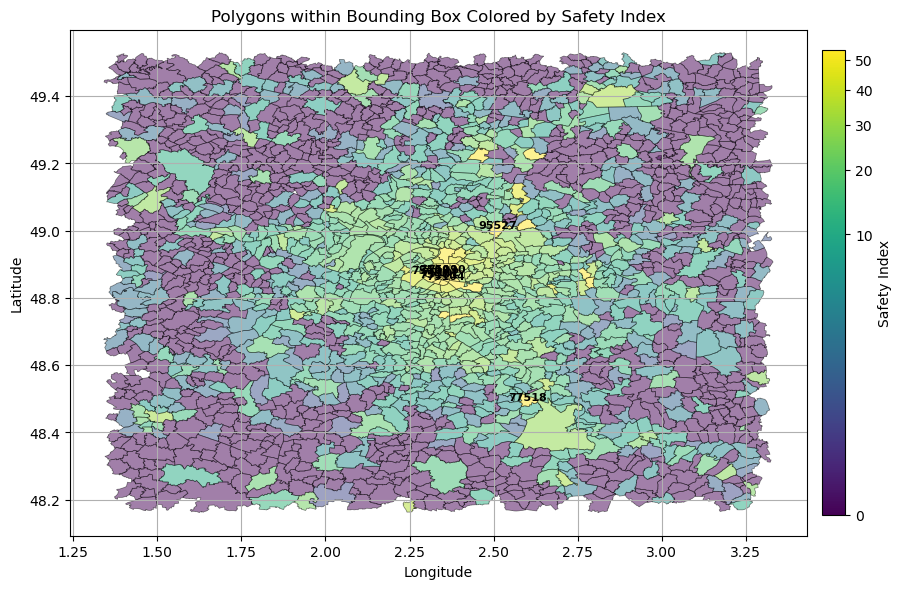

In [12]:
from matplotlib.colors import PowerNorm
# 1️⃣ Création du GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry='polygon')

# 2️⃣ Suppression des lignes sans géométrie
gdf = gdf[gdf['polygon'].notnull()]

# 3️⃣ Définition des limites de latitude et longitude à partir de df_paris
min_lat = df_paris['departure_latitude'].min()
max_lat = df_paris['departure_latitude'].max()
min_lon = df_paris['departure_longitude'].min()
max_lon = df_paris['departure_longitude'].max()

# 4️⃣ Création des boîtes englobantes
bbox = box(min_lon - 0.1, min_lat - 0.1, max_lon + 0.1, max_lat + 0.1)  # Boîte avec marge
bbox1 = box(min_lon, min_lat, max_lon, max_lat)  # Boîte exacte des points de départ

# 5️⃣ Filtrage des polygones à l'intérieur de la boîte
limited_gdf = gdf[gdf.geometry.within(bbox)]

# 6️⃣ Gestion des valeurs manquantes et des zéros dans 'safety'
limited_gdf['safety'] = limited_gdf['safety'].fillna(0)  # Remplacement des NaN par 0
limited_gdf['safety'] = limited_gdf['safety'].replace(0, 1e-7)  # Évite les problèmes avec LogNorm

# 7️⃣ Normalisation des valeurs pour l'affichage des couleurs
cmap = plt.cm.viridis  # Palette de couleurs
from matplotlib.colors import Normalize  # Import de Normalize

# 7️⃣ Normalisation des valeurs pour l'affichage des couleurs (Échelle linéaire au lieu de log)
vmax = limited_gdf['safety'].quantile(0.99)  # Coupe les valeurs extrêmes au 95e percentile
norm = PowerNorm(gamma=0.3, vmin=limited_gdf['safety'].min(), vmax=vmax)


# 8️⃣ Génération des couleurs pour les polygones
colors = cmap(norm(limited_gdf['safety']))

# 9️⃣ Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(10, 10))

# 🔟 Tracé des polygones avec les couleurs correspondantes
limited_gdf.plot(ax=ax, color=colors, alpha=0.5, edgecolor='black', linewidth=0.5)


for x, y, label, safety in zip(limited_gdf.geometry.centroid.x, limited_gdf.geometry.centroid.y, limited_gdf["#Code_commune_INSEE"], limited_gdf['safety']):
    if safety > 100:  # Condition sur le safety index
        ax.text(x, y, label, fontsize=8, color='black', ha='center', fontweight='bold')


# 🔢 Création et ajout de la barre de couleurs correctement alignée
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Correction pour éviter un warning
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Safety Index')

# 🏷 Ajout d’une légende avec la boîte englobante


# 📍 Titres et labels
plt.title('Polygons within Bounding Box Colored by Safety Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

# 🔥 Affichage du graphique
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


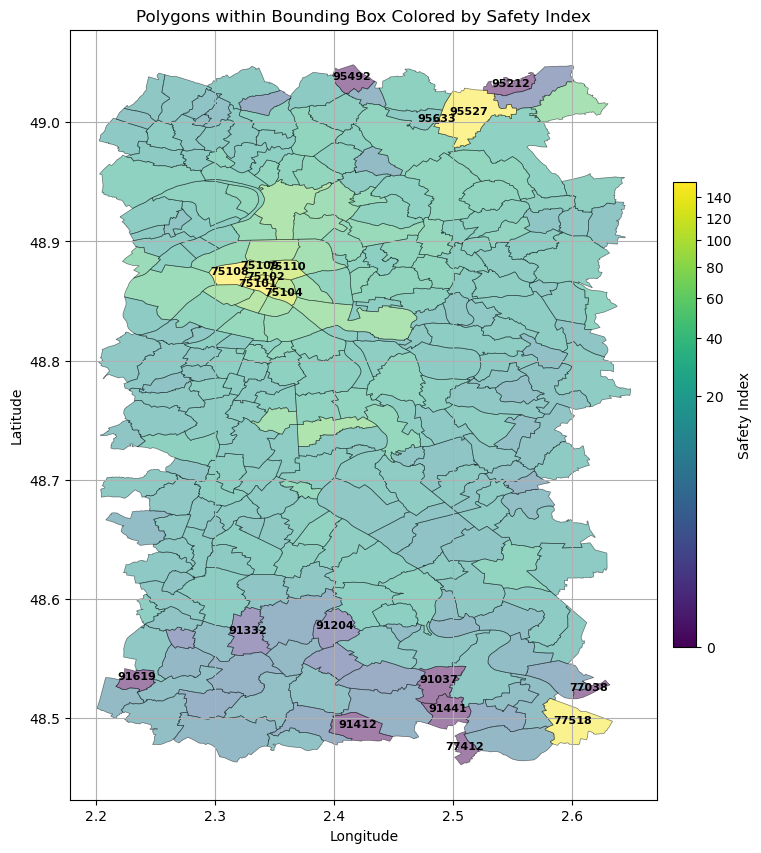

In [13]:
# 1️⃣ Création du GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry='polygon')

# 2️⃣ Suppression des lignes sans géométrie
gdf = gdf[gdf['polygon'].notnull()]

# 3️⃣ Définition des limites de latitude et longitude à partir de df_paris
min_lat = 48.46
max_lat = 49.05
min_lon = 2.2
max_lon = 2.65

# 4️⃣ Création des boîtes englobantes
bbox = box(min_lon, min_lat, max_lon, max_lat)  # Boîte avec marge

# 5️⃣ Filtrage des polygones à l'intérieur de la boîte
limited_gdf = gdf[gdf.geometry.within(bbox)]

# 6️⃣ Gestion des valeurs manquantes et des zéros dans 'safety'
limited_gdf['safety'] = limited_gdf['safety'].fillna(0)  # Remplacement des NaN par 0
limited_gdf['safety'] = limited_gdf['safety'].replace(0, 1e-7)  # Évite les problèmes avec LogNorm

# 7️⃣ Normalisation des valeurs pour l'affichage des couleurs
cmap = plt.cm.viridis  # Palette de couleurs
from matplotlib.colors import Normalize  # Import de Normalize

# 7️⃣ Normalisation des valeurs pour l'affichage des couleurs (Échelle linéaire au lieu de log)
vmax = limited_gdf['safety'].quantile(0.99)  # Coupe les valeurs extrêmes au 95e percentile
norm = PowerNorm(gamma=0.3, vmin=limited_gdf['safety'].min(), vmax=vmax)


# 8️⃣ Génération des couleurs pour les polygones
colors = cmap(norm(limited_gdf['safety']))

# 9️⃣ Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(10, 10))

# 🔟 Tracé des polygones avec les couleurs correspondantes
limited_gdf.plot(ax=ax, color=colors, alpha=0.5, edgecolor='black', linewidth=0.5)


for x, y, label, safety in zip(limited_gdf.geometry.centroid.x, limited_gdf.geometry.centroid.y, limited_gdf["#Code_commune_INSEE"], limited_gdf['safety']):
    if safety > 100 or safety<1:  # Condition sur le safety index
        ax.text(x, y, label, fontsize=8, color='black', ha='center', fontweight='bold')


# 🔢 Création et ajout de la barre de couleurs correctement alignée
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Correction pour éviter un warning
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Safety Index')

# 🏷 Ajout d’une légende avec la boîte englobante


# 📍 Titres et labels
plt.title('Polygons within Bounding Box Colored by Safety Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

# 🔥 Affichage du graphique
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


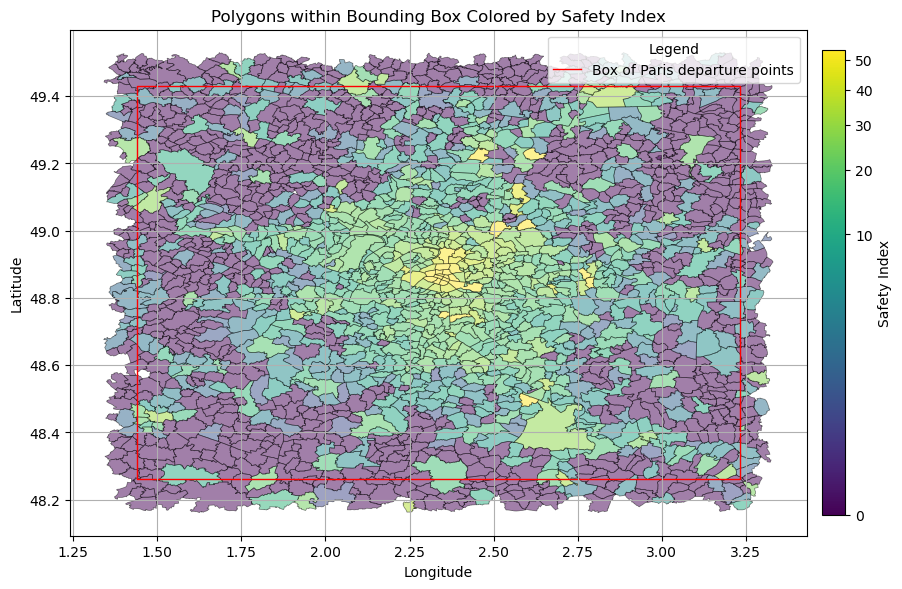

In [14]:
# 1️⃣ Création du GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry='polygon')

# 2️⃣ Suppression des lignes sans géométrie
gdf = gdf[gdf['polygon'].notnull()]

# 3️⃣ Définition des limites de latitude et longitude à partir de df_paris
min_lat = df_paris['departure_latitude'].min()
max_lat = df_paris['departure_latitude'].max()
min_lon = df_paris['departure_longitude'].min()
max_lon = df_paris['departure_longitude'].max()

# 4️⃣ Création des boîtes englobantes
bbox = box(min_lon - 0.1, min_lat - 0.1, max_lon + 0.1, max_lat + 0.1)  # Boîte avec marge
bbox1 = box(min_lon, min_lat, max_lon, max_lat)  # Boîte exacte des points de départ

# 5️⃣ Filtrage des polygones à l'intérieur de la boîte
limited_gdf = gdf[gdf.geometry.within(bbox)]

# 6️⃣ Gestion des valeurs manquantes et des zéros dans 'safety'
limited_gdf['safety'] = limited_gdf['safety'].fillna(0)  # Remplacement des NaN par 0
limited_gdf['safety'] = limited_gdf['safety'].replace(0, 1e-7)  # Évite les problèmes avec LogNorm

# 7️⃣ Normalisation des valeurs pour l'affichage des couleurs
cmap = plt.cm.viridis  # Palette de couleurs
vmax = limited_gdf['safety'].quantile(0.99)  # Coupe les valeurs extrêmes au 95e percentile
norm = PowerNorm(gamma=0.3, vmin=limited_gdf['safety'].min(), vmax=vmax)

# 8️⃣ Génération des couleurs pour les polygones
colors = cmap(norm(limited_gdf['safety']))

# 9️⃣ Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(10, 10))

# 🔟 Tracé des polygones avec les couleurs correspondantes
limited_gdf.plot(ax=ax, color=colors, alpha=0.5, edgecolor='black', linewidth=0.5)

# 🔴 Tracé de la boîte englobante en rouge
gpd.GeoSeries(bbox1).plot(ax=ax, color='none', edgecolor='red', linewidth=1)

# 🔢 Création et ajout de la barre de couleurs correctement alignée
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Correction pour éviter un warning
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Safety Index')

# 🏷 Ajout d’une légende avec la boîte englobante
bbox_line = Line2D([0], [0], color='red', linewidth=1, label='Box of Paris departure points')
ax.legend(handles=[bbox_line], title='Legend')

# 📍 Titres et labels
plt.title('Polygons within Bounding Box Colored by Safety Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

# 🔥 Affichage du graphique
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


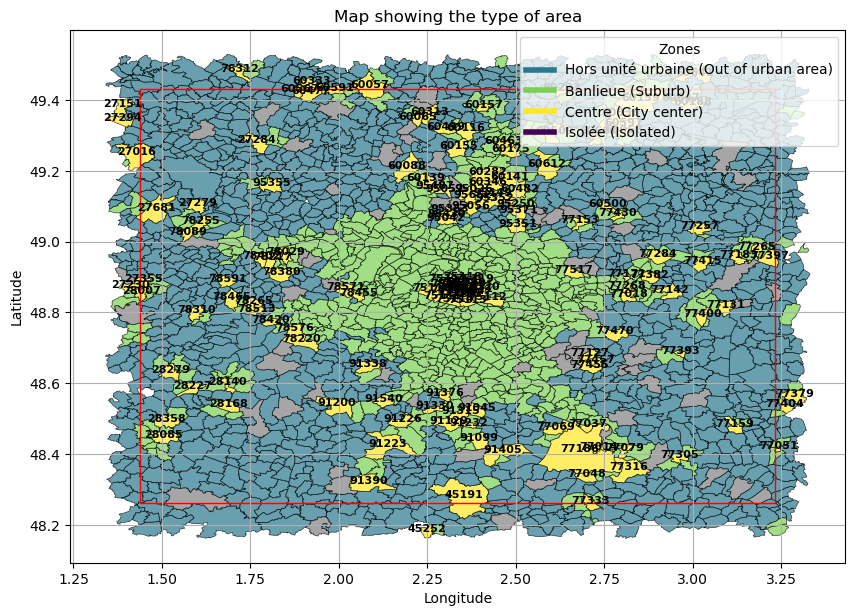

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from matplotlib.lines import Line2D

# 1️⃣ Création du GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry='polygon')

# 2️⃣ Suppression des lignes sans géométrie
gdf = gdf[gdf['polygon'].notnull()]

# 3️⃣ Définition des limites de latitude et longitude à partir de df_paris
min_lat = df_paris['departure_latitude'].min()
max_lat = df_paris['departure_latitude'].max()
min_lon = df_paris['departure_longitude'].min()
max_lon = df_paris['departure_longitude'].max()

# 4️⃣ Création des boîtes englobantes
bbox = box(min_lon - 0.1, min_lat - 0.1, max_lon + 0.1, max_lat + 0.1)  # Boîte avec marge
bbox1 = box(min_lon, min_lat, max_lon, max_lat)  # Boîte exacte des points de départ

# 5️⃣ Filtrage des polygones à l'intérieur de la boîte
limited_gdf = gdf[gdf.geometry.within(bbox)]

# 6️⃣ Définition des couleurs pour chaque catégorie
color_mapping = {
    'Hors unité urbaine': '#2A788E',    # 🔴 Rouge
    'Banlieue': '#7AD151',             # 🔵 Bleu
    'Centre': '#FDE725',              # 🟢 Vert
    'Isolées': '#440154'              # 🟣 Violet
}

# 7️⃣ Attribution des couleurs en fonction des valeurs des colonnes
def assign_color(row):
    if row['Hors unité urbaine'] == 1:
        return color_mapping['Hors unité urbaine']
    elif row['Banlieue'] == 1:
        return color_mapping['Banlieue']
    elif row['Centre'] == 1:
        return color_mapping['Centre']
    elif row['Isolées'] == 1:
        return color_mapping['Isolées']
    else:
        return 'gray'  # ⚪ Couleur par défaut si aucune correspondance

limited_gdf['color'] = limited_gdf.apply(assign_color, axis=1)

# 8️⃣ Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(10, 10))

# 9️⃣ Tracé des polygones avec les couleurs attribuées
limited_gdf.plot(ax=ax, color=limited_gdf['color'], alpha=0.7, edgecolor='black', linewidth=0.5)

# 🔴 Tracé de la boîte englobante en rouge
gpd.GeoSeries(bbox1).plot(ax=ax, color='none', edgecolor='red', linewidth=1)

# 🔤 Affichage des noms des zones pour "Centre"
centres_gdf = limited_gdf[limited_gdf['Centre'] == 1]  # Filtrer uniquement les zones Centre

for x, y, label in zip(centres_gdf.geometry.centroid.x, centres_gdf.geometry.centroid.y, centres_gdf["#Code_commune_INSEE"]):
    ax.text(x, y, label, fontsize=8, color='black', ha='center', fontweight='bold')

# 🔢 Création de la légende
legend_elements = [
    Line2D([0], [0], color='#2A788E', lw=4, label='Hors unité urbaine (Out of urban area)'),
    Line2D([0], [0], color='#7AD151', lw=4, label='Banlieue (Suburb)'),
    Line2D([0], [0], color='#FDE725', lw=4, label='Centre (City center)'),
    Line2D([0], [0], color='#440154', lw=4, label='Isolée (Isolated)')
]

ax.legend(handles=legend_elements, title='Zones')

# 📍 Titres et labels
plt.title('Map showing the type of area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

# 🔥 Affichage du graphique
plt.show()


In [16]:
import requests
import zipfile
import os

file_path = 'data_CSV/code_postal.csv'

merged_df.to_csv(file_path, index=False)